# Assignment 3 : Linear Models
## Basic Preparation
### 1. Import package and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from yellowbrick.regressor import ResidualsPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

In [3]:
vg=pd.read_csv("vgsales.csv")
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 2. Data Cleaning
    Search and deal with missing values, inappropriate values and bad data.

In [5]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# From the chart, there are 271 missing values in 'Year' column and 58 missing values in 'Publisher' column.
# Drop rows containing missing values
vg.dropna(inplace=True)

In [7]:
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# modify highly correlated variables
vg['Global_Sales']=vg['NA_Sales']+vg['EU_Sales']+vg['JP_Sales']+vg['Other_Sales']
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


## Linear Model
### 1. Checking the relationship between numerical data

In [9]:
vgNew=vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
vgNew.head()
vgNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5)
memory usage: 763.6 KB


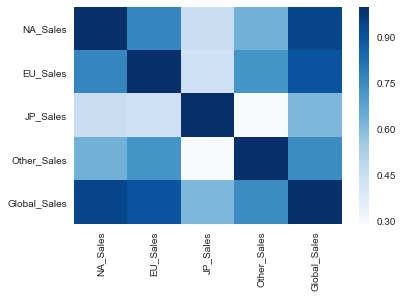

In [10]:
corr=vgNew.corr()
sns.heatmap(corr,cmap="Blues")

In [11]:
vgN=vgNew[['NA_Sales','EU_Sales','Global_Sales']]

In [12]:
# Using zscore to detect outlier and remove them
z=np.abs(stats.zscore(vgN))
z

array([[50.1264692 , 56.69151539, 52.44271815],
       [35.03661496,  6.73935664, 25.32796392],
       [18.94968736, 25.00016939, 22.51440942],
       ...,
       [ 0.32301125,  0.29007451,  0.34492338],
       [ 0.32301125,  0.27043923,  0.33854344],
       [ 0.31085182,  0.29007451,  0.33854344]])

In [13]:
print(np.where(z>3))

(array([  0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   3,   4,
         4,   4,   5,   5,   5,   6,   6,   6,   7,   7,   7,   8,   8,
         8,   9,   9,  10,  10,  10,  11,  11,  11,  12,  12,  12,  13,
        13,  13,  14,  14,  14,  15,  15,  15,  16,  16,  16,  17,  17,
        18,  18,  18,  19,  19,  19,  20,  20,  20,  21,  21,  21,  22,
        22,  22,  23,  23,  23,  24,  24,  24,  25,  25,  25,  26,  26,
        26,  27,  27,  27,  28,  28,  28,  29,  29,  29,  30,  30,  30,
        31,  31,  31,  32,  32,  32,  33,  33,  33,  34,  34,  34,  35,
        35,  35,  36,  36,  36,  37,  37,  37,  38,  38,  38,  39,  39,
        39,  40,  40,  40,  41,  41,  42,  42,  42,  43,  43,  43,  44,
        44,  44,  45,  45,  45,  46,  46,  46,  47,  47,  48,  48,  48,
        49,  49,  49,  50,  50,  50,  51,  51,  51,  52,  52,  52,  53,
        53,  53,  54,  54,  54,  55,  55,  55,  56,  56,  56,  57,  57,
        57,  58,  58,  58,  59,  59,  59,  60,  60,  60,  61,  

In [14]:
vgBN=vgN[(z<3).all(axis=1)]

In [15]:
vgBN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16008 entries, 180 to 16597
Data columns (total 3 columns):
NA_Sales        16008 non-null float64
EU_Sales        16008 non-null float64
Global_Sales    16008 non-null float64
dtypes: float64(3)
memory usage: 500.2 KB


### 2. Create a multiple linear regression model

In [16]:
# build X and y 
X=vgBN[['NA_Sales','EU_Sales']]
y=vgBN[['Global_Sales']]

In [17]:
# build training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12006, 2)
(4002, 2)
(12006, 1)
(4002, 1)


In [18]:
mlr=LinearRegression()
model=mlr.fit(X_train,y_train)
print(model)
print(mlr.intercept_)
print(mlr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[0.05492572]
[[1.09833396 1.22734531]]


In [19]:
# Prediction
y_pred=mlr.predict(X_test)
print(y_pred)
print(type(y_pred))

[[0.15377577]
 [0.42445417]
 [0.18672579]
 ...
 [0.16604923]
 [0.05492572]
 [0.52459434]]
<class 'numpy.ndarray'>


This means that our best fit line is: $$y = a + b x + c x$$

Which translates in to the equations below:

$$ sale_{global} = 0.055 + 1.098  sale_{NA} + 1.224  sale_{EU} + \varepsilon $$
Next let's use statsmodels.

In [20]:
smodel=sm.OLS(y_train,X_train)
results=smodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 6.331e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:21:08   Log-Likelihood:                 1347.6
No. Observations:               12006   AIC:                            -2691.
Df Residuals:                   12004   BIC:                            -2677.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NA_Sales       1.1485      0.007    159.124      0.000       1.134       1.163
EU_Sales       1.2713      0.013    100.950      0.000       1.247       1.296
==============================================================================
Omnibus:                    14497.791   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2268075.005
Skew:                           6.445   Prob(JB):                         0.00
Kurtosis:                      69.089   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  NA_Sales    1.148453
EU_Sales    1.271303
dtype: float64
R2:  0.9134117267602325


In [22]:
# Our model needs an intercept so we add a column of 1s:
X_train=sm.add_constant(X_train)
smodel=sm.OLS(y_train,X_train)
results=smodel.fit()
print(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 4.498e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:21:10   Log-Likelihood:                 1638.9
No. Observations:               12006   AIC:                            -3272.
Df Residuals:                   12003   BIC:                            -3250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0549      0.002     24.427      0.000       0.051       0.059
NA_Sales       1.0983      0.007    149.690      0.000       1.084       1.113
EU_Sales       1.2273      0.012     98.796      0.000       1.203       1.252
==============================================================================
Omnibus:                    14891.017   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2467137.561
Skew:                           6.757   Prob(JB):                         0.00
Kurtosis:                      71.914   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       0.054926
NA_Sales    1.098334
EU_Sales    1.227345
dtype: float64
R2:  0.8822751729597464


The coefficients are almost identical to what we saw before with scikit-learn, and the fit is pretty good ($R^2=0.880$).

### 3. Assessing the model fit

A. Does it make sense?
   
Yes, it makes sense. For the multiple linear regression model we get above, if sales in NA area increases 1 million, sales around the world will increase 1.10 million and if sales in EU area increases 1 million, sales around the world will increase 1.23 million.

Which translates in to the equations below:

$$ sale_{global} = 0.054 + 1.096  sale_{NA} + 1.231  sale_{EU} + \varepsilon $$

B. Is the "true" $\beta_1$ significantly differnet from  $\beta_1 = 0$?

From the OLS Regression Results above, we could see that p value are all less than 0.05. So the conclusion is that the "true" $\beta_1$ significantly differnet from  $\beta_1 = 0$.

C. Are any assumptions of the model violated?

This question will be assessed and showed at the 4th part.

D. How tightly the parameter estimation fits the residuals?

This question will be assessed and showed at the 5th part.

### 4. Assessing the regression assumptions

1. There should not be a dependency between the residuals and the fitted values

Text(0,0.5,'Residuals')

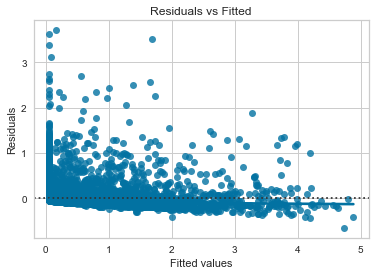

In [24]:
fitted=results.fittedvalues

residuals=results.resid

residPlot=sns.residplot(fitted,residuals,data=vgBN,lowess=True)
residPlot.set_title('Residuals vs Fitted')
residPlot.set_xlabel('Fitted values')
residPlot.set_ylabel('Residuals')

From the residual plot above, it's apparent that the lowess line is basically coincides with the axis 0 which means the error terms have mean zero.                                 

2. Autocorrelation : error terms should be independent of each other 

From the OLS Regression Results above, we could see that the value of Durbin-Watson is 1.743 which is nearly to 2. So there is positive serial correlation but we could nearly deem that there is no autocorrelation.

3. Multicollinearity : Independent variables should be independent of each other

In [25]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[1.361877549650533, 1.7465293871838092, 1.7465293871838088]

It's known that if a variable's VIF is less than 3, there is basically no multicollinearity problem with this variable. From the outputs above, the conclusion is that there is no multicollinearity.

4. Homoskedasticity : The variance of the error term should be a constant

From the residual plot above, with the increasing of fitted values, the residuals decreases. So heteroskedasticity is apparent. So we need to do a nonlinear transformation for dependent variable.

5. normality of the error distribution

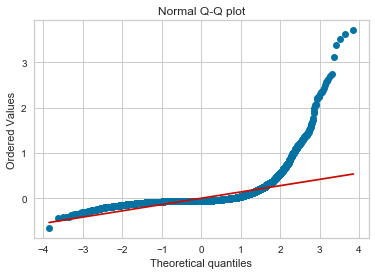

In [26]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

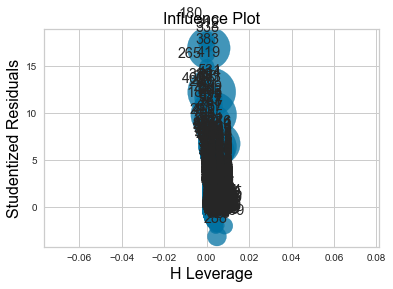

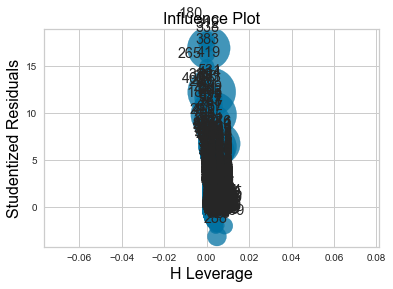

In [27]:
sm.graphics.influence_plot(results,criterion="cooks")

From the qqplot above, the error terms does not conform to a normal distribution, so the dependent variable need to be transformed into nonlinear.

From the influence plot, it's apparent that almost all data points have same leverages approximate to 0.

### 5.  Assessing the model fit

1). Coefficient of determination ($R^2)$

From the $R^2 got above, $R^2 is 0.88 which means the goodness of fit of the model is high.

2). MAE ( Mean Absolute Error)

In [28]:
mean_absolute_error(y_test,y_pred)

0.0987042847993162

On the ground that the smaller MAE is,the fit is better. According to the result we got from mean_absolute_error() method, the model fit is well.

3). MSE ( Mean Squared Error)

In [29]:
mean_squared_error(y_test,y_pred)

0.048639142274612274

On the ground that the smaller MSE is,the fit is better. According to the result we got from mean_squared_error() method, the model fit is well.

### Cross-validation

In [40]:
scores=cross_val_score(mlr,X_train,y_train,cv=10)
scores

array([0.85727274, 0.89118432, 0.88203806, 0.93133693, 0.89129589,
       0.88764338, 0.87323367, 0.87302679, 0.8356786 , 0.89865382])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.05)


Through 10-fold cross-validation, the accuracy of the linear regression model is high.

In [42]:
predicted = cross_val_predict(mlr,X, y, cv=10)

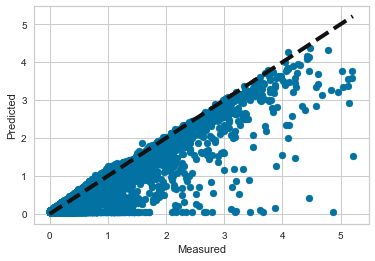

In [43]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Report of Part A

##### * Is the relationship significant?   

Yes, it's significant. For the multiple linear regression model we get above, if sales in NA area increases 1 million, sales around the world will increase 1.10 million and if sales in EU area increases 1 million, sales around the world will increase 1.23 million.

Which translates in to the equations below:

$$ sale_{global} = 0.054 + 1.096  sale_{NA} + 1.231  sale_{EU} + \varepsilon $$

##### * Are any model assumptions violated?   

It does not violate the multicolinearity and autocorrelation but the error terms does not conform to the normal distribution and the homoskedasticity is violated.

##### * Is there any multi-colinearity in the model?   

It's known that if a variable's VIF is less than 3, there is basically no multicollinearity problem with this variable. From the outputs above, the conclusion is that there is no multicollinearity.

##### * In the multiple regression models are predictor variables independent of all the other predictor variables? 

Yes, in the multiple regression model, predictor variables are independent of each other.

##### * In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   

From the model above, according to the correlation heatmap, the most signidicant predictors are EU_Sales and NA_Sales. So I exclude JP_Sales and Other_Sales to build the multiple regression models. According to the coefficients, the most signidicant predictor is EU_Sales then NA_Sales.

##### * Does the model make sense?  

Yes, it makes sense. From the model, we are able to predict a game's sale around the world through sales on NA and EU area. And according to the coefficients, we prefer take some actions to increase the sales in EU area.

##### * Cross-validate the model. How well did it do?  

Through 10-fold cross-validation, the accuracy of the linear regression model is high.

## Regularization



In [272]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)

In [273]:
mlr.fit(X_train_poly4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [274]:
X_test_poly4 = poly4.fit_transform(X_test)
print("Quadratic linear model prediction score:", mlr.score(X_test_poly4, y_test))

Quadratic linear model prediction score: 0.8749890499483787


In [278]:
ridge=Ridge()

In [279]:
ridge.fit(X_train_poly4,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [280]:
print("Ridge Regularization's prediction score：", ridge.score(X_test_poly4, y_test))

Ridge Regularization's prediction score： 0.8751232908595233


Here I used Ridge Regression for the regularization. From the prediction scores before and after regularization,it's apparent that regularization helps with creating models that validate better on out of sample data.